In [1]:
from simple_multi_unet_model import multi_unet_model
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [2]:
#Resizing images
SIZE_X = 128 
SIZE_Y = 128
n_classes=4 #Number of classes for segmentation

In [3]:
train_images = []

In [4]:
for directory_path in glob.glob("128_patches/images/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, 0)       
        train_images.append(img)


In [5]:
#Convert list to array     
train_images = np.array(train_images)


In [6]:
train_images

array([[[117, 124, 127, ..., 116, 138, 140],
        [122, 123, 123, ..., 114, 125, 128],
        [124, 124, 122, ..., 125, 121, 111],
        ...,
        [ 92,  71,  55, ..., 157, 135, 121],
        [131, 115,  91, ..., 144, 127, 116],
        [135, 140, 138, ..., 135, 124, 120]],

       [[ 27,  30,  44, ...,  56,  59,  78],
        [ 31,  35,  48, ...,  44,  48,  62],
        [ 38,  37,  55, ...,  28,  37,  49],
        ...,
        [127, 123, 118, ..., 132, 131, 122],
        [124, 122, 116, ..., 133, 128, 128],
        [114, 113, 117, ..., 117, 115, 122]],

       [[143, 132, 126, ..., 113, 105,  94],
        [139, 129, 121, ...,  99,  99, 100],
        [126, 123, 114, ...,  91,  98, 101],
        ...,
        [125, 132, 131, ..., 127, 144, 144],
        [125, 127, 131, ..., 151, 141, 136],
        [120, 124, 124, ..., 160, 143, 136]],

       ...,

       [[ 96, 102, 110, ..., 149, 150, 151],
        [105, 106, 110, ..., 146, 143, 148],
        [114, 110, 107, ..., 149, 144, 149

In [7]:
train_masks = [] 
for directory_path in glob.glob("128_patches/masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        mask = cv2.imread(mask_path, 0)       
        train_masks.append(mask)


In [8]:
#Convert list to array       
train_masks = np.array(train_masks)


In [9]:
train_masks

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

In [10]:
#Making the classes as 0,1,2,3
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

np.unique(train_masks_encoded_original_shape)


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3], dtype=int64)

In [11]:
#Expanding the dimensions and normalizing
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)


In [12]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)


In [13]:

X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))


Class values in the dataset are ...  [0 1 2 3]


In [14]:
#one hot encoding of the values to represent categorical values as numerical values in a machine learning model
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))


In [15]:
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [16]:

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]


In [17]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        160 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128, 128,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 16, 16,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 128) │          0 │ conv2d_7[0][0]  

 Total params: 1,940,868 (7.40 MB)

 Trainable params: 1,940,868 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
call = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3)

In [20]:
history = model.fit(X_train, y_train_cat, 
                    batch_size = 4, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test_cat), 
                    callbacks=[call],
                    shuffle=False)


Epoch 1/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 55s 165ms/step - accuracy: 0.7427 - loss: 0.7677 - val_accuracy: 0.8854 - val_loss: 0.3527
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 60s 208ms/step - accuracy: 0.8841 - loss: 0.3537 - val_accuracy: 0.8967 - val_loss: 0.2666
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 53s 185ms/step - accuracy: 0.8971 - loss: 0.2841 - val_accuracy: 0.9121 - val_loss: 0.2387
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 76s 165ms/step - accuracy: 0.9112 - loss: 0.2485 - val_accuracy: 0.9277 - val_loss: 0.1988
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 61s 213ms/step - accuracy: 0.9216 - loss: 0.2212 - val_accuracy: 0.9348 - val_loss: 0.1804
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 55s 191ms/step - accuracy: 0.9269 - loss: 0.2080 - val_accuracy: 0.9370 - val_loss: 0.1742
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 54s 189ms/step - accuracy: 0.9330 - loss: 0.1897 - val_accuracy: 0.9395 - val_loss: 0.1671
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 60s 208ms/step - accuracy: 0.9380 - loss: 0

In [21]:
model.save('test.hdf5')

In [22]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - accuracy: 0.9511 - loss: 0.1383
Accuracy is =  95.0421929359436 %


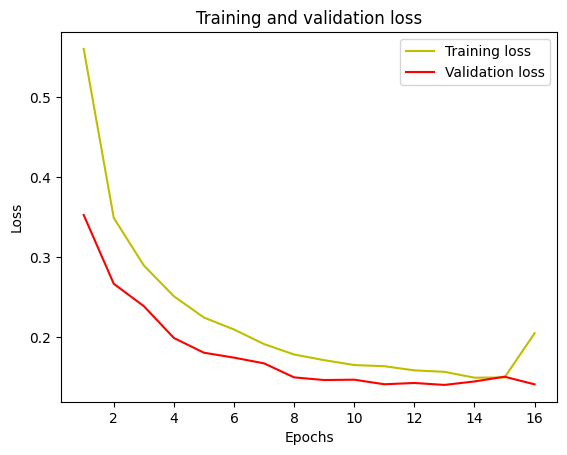

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


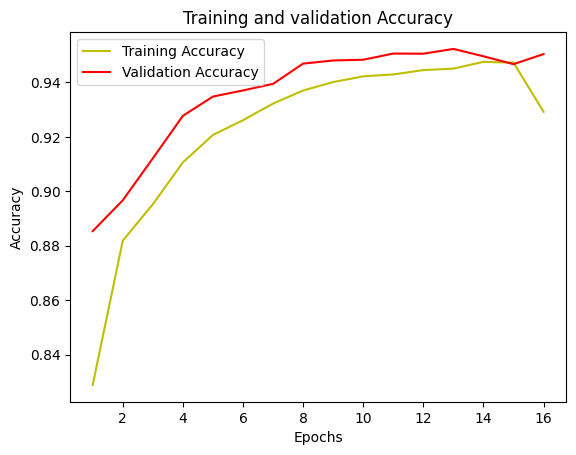

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [26]:
model.load_weights('test.hdf5')  

In [27]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 431ms/step


In [28]:
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.813115


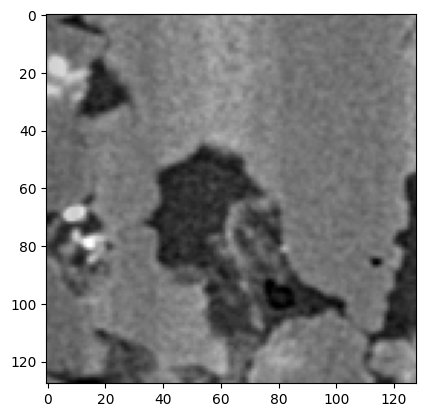

In [29]:
plt.imshow(train_images[0, :,:,0],cmap= 'grey')

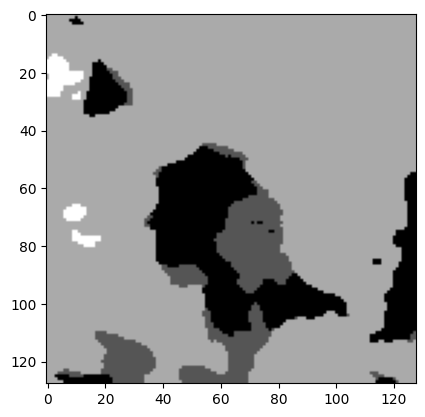

In [30]:
plt.imshow(train_masks[0],cmap='grey')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step


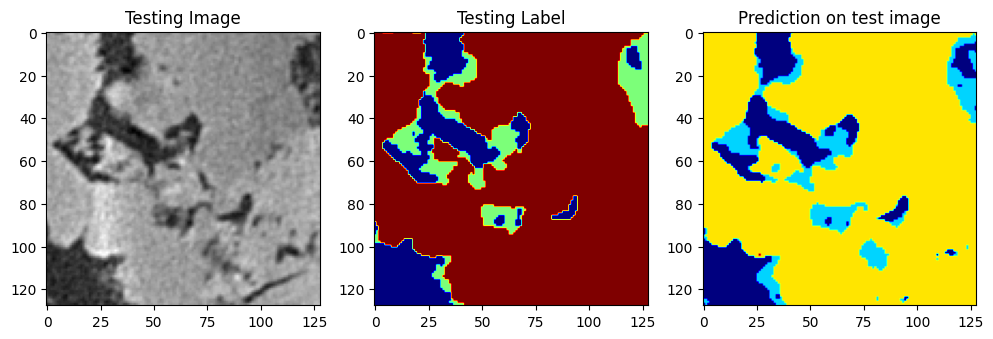

In [31]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()
